# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
#city_data = []

# Print to logger
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters
#record_count = 1
#set_count = 1

# Loop through all the cities in our list to fetch weather data
#for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 0

        # Create endpoint URL with each city
        #city_url = url + "&q=" + city
    
        # Log the url, record, and set numbers
        #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

        # Add 1 to the record count
        #record_count += 1

        # Run an API request for each of the cities
        #try:
            # Parse the JSON and retrieve data
            #city_weather = requests.get(city_url).json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            #city_lat = city_weather["coord"]["lat"]
            #city_lng = city_weather["coord"]["lon"]
            #city_max_temp = city_weather["main"]["temp_max"]
            #city_humidity = city_weather["main"]["humidity"]
            #city_clouds = city_weather["clouds"]["all"]
            #city_wind = city_weather["wind"]["speed"]
            #city_country = city_weather["sys"]["country"]
            #city_date = city_weather["dt"]

            # Append the City information into city_data list
            #city_data.append({"City": city, 
                          #"Lat": city_lat, 
                          #"Lng": city_lng, 
                          #"Max Temp": city_max_temp,
                          #"Humidity": city_humidity,
                          #"Cloudiness": city_clouds,
                          #"Wind Speed": city_wind,
                          #"Country": city_country,
                          #"Date": city_date})

        # If an error is experienced, skip the city
        #except:
            #print("City not found. Skipping...")
            #pass
                  
# Indicate that Data Loading is complete 
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")    
        
        
        
        
    # Create endpoint URL with each city
    #city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    #record_count += 1

    # Run an API request for each of the cities
    #try:
        # Parse the JSON and retrieve data
        #city_weather = requests.get(query_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #city_lat = ["coord"]["lat"]
        #city_lng = ["coord"]["lon"]
        #city_max_temp = ["main"]["temp_max"]
        #city_humidity = ["main"]["humidity"]
        #city_clouds = ["clouds"]["all"]
        #city_wind = ["wind"]["speed"]
        #city_country = ["sys"]["country"]
        #city_date = ["dt"]

        # Append the City information into city_data list
        #city_data.append({"City": city, 
                          #"Lat": city_lat, 
                          #"Lng": city_lng, 
                          #"Max Temp": city_max_temp,
                          #"Humidity": city_humidity,
                          #"Cloudiness": city_clouds,
                          #"Wind Speed": city_wind,
                          #"Country": city_country,
                          #"Date": city_date})

    # If an error is experienced, skip the city
    #except:
        #print("City not found. Skipping...")
        #pass
              
# Indicate that Data Loading is complete 
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carmen
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | darlawn
Processing Record 5 of Set 1 | ahuimanu
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | sibolga
Processing Record 10 of Set 1 | itoman
Processing Record 11 of Set 1 | kutum
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | asasa
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | yatou
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | asau
Processing Record 23 of Set 1 | gr

Processing Record 38 of Set 4 | tubuala
Processing Record 39 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 40 of Set 4 | liverpool
Processing Record 41 of Set 4 | almeria
Processing Record 42 of Set 4 | sao filipe
Processing Record 43 of Set 4 | torit
Processing Record 44 of Set 4 | constitucion
Processing Record 45 of Set 4 | grand gaube
Processing Record 46 of Set 4 | asyut
Processing Record 47 of Set 4 | berlevag
Processing Record 48 of Set 4 | olafsvik
Processing Record 49 of Set 4 | at-bashi
Processing Record 0 of Set 5 | pevek
Processing Record 1 of Set 5 | salinopolis
Processing Record 2 of Set 5 | taitung
Processing Record 3 of Set 5 | aitape
Processing Record 4 of Set 5 | kiama
Processing Record 5 of Set 5 | anadyr
Processing Record 6 of Set 5 | pandamatenga
Processing Record 7 of Set 5 | artyk
City not found. Skipping...
Processing Record 8 of Set 5 | kavieng
Processing Record 9 of Set 5 | parrsboro
Processing Record 10 of Set 5 | meridian
Processing Re

Processing Record 27 of Set 8 | valkeala
Processing Record 28 of Set 8 | adrar
Processing Record 29 of Set 8 | makakilo city
Processing Record 30 of Set 8 | valley
Processing Record 31 of Set 8 | grand-santi
Processing Record 32 of Set 8 | airai
Processing Record 33 of Set 8 | wang saphung
Processing Record 34 of Set 8 | abnub
Processing Record 35 of Set 8 | coihaique
Processing Record 36 of Set 8 | rocha
Processing Record 37 of Set 8 | buzmeyin
Processing Record 38 of Set 8 | tiarei
Processing Record 39 of Set 8 | sao joao dos patos
Processing Record 40 of Set 8 | valga
Processing Record 41 of Set 8 | pangnirtung
Processing Record 42 of Set 8 | geraldton
Processing Record 43 of Set 8 | kushmurun
Processing Record 44 of Set 8 | gamba
Processing Record 45 of Set 8 | pizarro
Processing Record 46 of Set 8 | qostanay
Processing Record 47 of Set 8 | ambulu
Processing Record 48 of Set 8 | manaure
Processing Record 49 of Set 8 | yulara
Processing Record 0 of Set 9 | whitehorse
Processing Reco

Processing Record 14 of Set 12 | rodino
Processing Record 15 of Set 12 | hanover
Processing Record 16 of Set 12 | kununurra
Processing Record 17 of Set 12 | ciras
City not found. Skipping...
Processing Record 18 of Set 12 | kilindoni
Processing Record 19 of Set 12 | venustiano carranza
Processing Record 20 of Set 12 | bend
Processing Record 21 of Set 12 | maltahohe
Processing Record 22 of Set 12 | umm lajj
Processing Record 23 of Set 12 | puerto escondido
Processing Record 24 of Set 12 | cordoba
Processing Record 25 of Set 12 | kismayo
Processing Record 26 of Set 12 | alta floresta
Processing Record 27 of Set 12 | kholodnyy
Processing Record 28 of Set 12 | shaunavon
Processing Record 29 of Set 12 | hunchun
Processing Record 30 of Set 12 | iqaluit
Processing Record 31 of Set 12 | skibbereen
Processing Record 32 of Set 12 | aksu
Processing Record 33 of Set 12 | kirgiz-miyaki
Processing Record 34 of Set 12 | ketchikan
Processing Record 35 of Set 12 | ulaangom
Processing Record 36 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,carmen,18.6333,-91.8333,22.02,100,100,0.00,MX,1679250195
1,carnarvon,-24.8667,113.6333,23.31,79,0,8.88,AU,1679250334
2,qaanaaq,77.4840,-69.3632,-22.66,70,41,2.87,GL,1679250335
3,darlawn,24.0167,92.9000,14.59,98,100,0.93,IN,1679250336
4,ahuimanu,21.4447,-157.8378,26.22,80,75,2.24,US,1679250337


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carmen,18.6333,-91.8333,22.02,100,100,0.00,MX,1679250195
1,carnarvon,-24.8667,113.6333,23.31,79,0,8.88,AU,1679250334
2,qaanaaq,77.4840,-69.3632,-22.66,70,41,2.87,GL,1679250335
3,darlawn,24.0167,92.9000,14.59,98,100,0.93,IN,1679250336
4,ahuimanu,21.4447,-157.8378,26.22,80,75,2.24,US,1679250337


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# Build scatter plot for latitude vs. temperature
cities_lat = city_data_df["Lat"]
cities_temp = city_data_df["Max Temp"]
plt.scatter(cities_lat, cities_temp)

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities")
plt.ylabel("Maximum Temperatures of Cities")
plt.title("Latitude vs. Maximum Temperatures of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

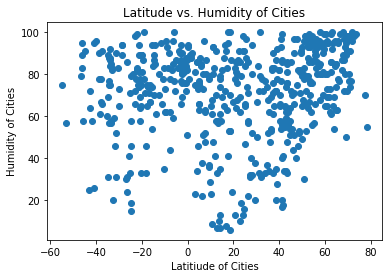

In [9]:
# Build the scatter plots for latitude vs. humidity
cities_lat = city_data_df["Lat"]
cities_hum = city_data_df["Humidity"]
plt.scatter(cities_lat, cities_hum)

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities")
plt.ylabel("Humidity of Cities")
plt.title("Latitude vs. Humidity of Cities")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

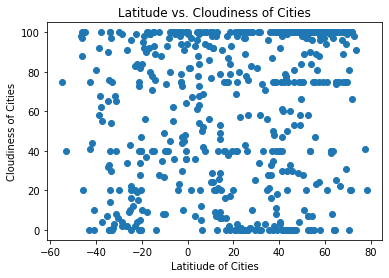

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cities_lat = city_data_df["Lat"]
cities_clo = city_data_df["Cloudiness"]
plt.scatter(cities_lat, cities_clo)

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities")
plt.ylabel("Cloudiness of Cities")
plt.title("Latitude vs. Cloudiness of Cities")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

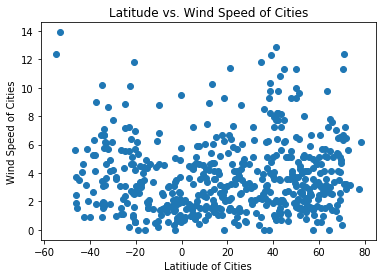

In [11]:
# Build the scatter plots for latitude vs. wind speed
cities_lat = city_data_df["Lat"]
cities_ws = city_data_df["Wind Speed"]
plt.scatter(cities_lat, cities_ws)

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities")
plt.ylabel("Wind Speed of Cities")
plt.title("Latitude vs. Wind Speed of Cities")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.7x +35.65


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,carmen,18.6333,-91.8333,22.02,100,100,0.00,MX,1679250195
2,qaanaaq,77.4840,-69.3632,-22.66,70,41,2.87,GL,1679250335
3,darlawn,24.0167,92.9000,14.59,98,100,0.93,IN,1679250336
4,ahuimanu,21.4447,-157.8378,26.22,80,75,2.24,US,1679250337
5,nikolskoye,59.7035,30.7861,2.94,99,100,2.14,RU,1679250338


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,carnarvon,-24.8667,113.6333,23.31,79,0,8.88,AU,1679250334
6,punta arenas,-53.1500,-70.9167,10.06,57,40,13.89,CL,1679250338
11,busselton,-33.6500,115.3333,18.82,58,54,6.20,AU,1679250340
14,atuona,-9.8000,-139.0333,26.87,73,8,6.81,PF,1679250341
15,lebu,-37.6167,-73.6500,15.65,66,4,8.98,CL,1679250342


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8947972199131558.


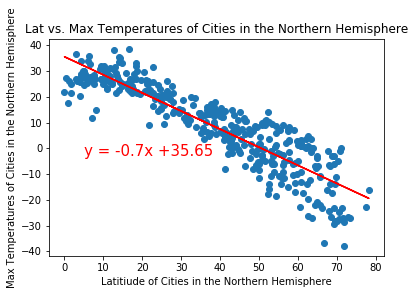

In [43]:
# Build scatter plot for latitude vs. temperature
nh_lat = northern_hemi_df["Lat"]
nh_temp = northern_hemi_df["Max Temp"]
plt.scatter(nh_lat, nh_temp)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_temp)
regress_values = slope * nh_lat + intercept

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities in the Northern Hemisphere")
plt.ylabel("Max Temperatures of Cities in the Northern Hemisphere")
plt.title("Lat vs. Max Temperatures of Cities in the Northern Hemisphere")
plt.plot(nh_lat, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(5,-3),fontsize=15,color="red")

# Show plot
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: 0.5466838107467121.


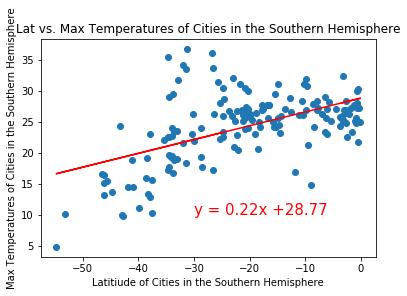

In [48]:
# Build scatter plot for latitude vs. temperature
sh_lat = southern_hemi_df["Lat"]
sh_temp = southern_hemi_df["Max Temp"]
plt.scatter(sh_lat, sh_temp)

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_temp)
regress_values = slope * sh_lat + intercept

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities in the Southern Hemisphere")
plt.ylabel("Max Temperatures of Cities in the Southern Hemisphere")
plt.title("Lat vs. Max Temperatures of Cities in the Southern Hemisphere")
plt.plot(sh_lat, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Show plot
print(f"The r-value is: {rvalue}.")
plt.show()

**Discussion about the linear relationship:** The latitude and maximum temperature strongly correlate negatively with an increasing latitude, as can be seen on the graph displaying latitude and maximum temperature for cities in the northern hemisphere. This makes sense as temperatures will decrease the further up north one moves from the Equator. The relationship between the latitude and the maximum temperature in the southern hemisphere are loosely positively correlated. The further one moves towards the equator, the more temperatures will increase however the correlation in the southern hemisphere is not as large as in the northern hemisphere. This could possibly be due to the fact that there are less cities and largely populated cities in the southern hemisphere in comparison to the northern hemisphere. Also, the majority of land masses in the southern hemisphere are closer to the Equator and not as distributed as in the northern hemisphere. Therefore, cities will be more likely to have warmer temperatures in the southern hemisphere, which can skew the correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.32907446781133004.


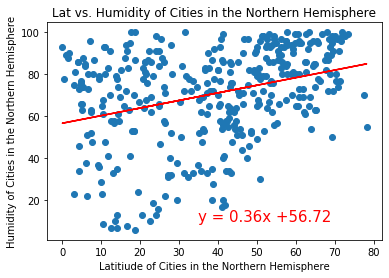

In [52]:
# Build scatter plot for latitude vs. humidity
nh_lat = northern_hemi_df["Lat"]
nh_hum = northern_hemi_df["Humidity"]
plt.scatter(nh_lat, nh_hum)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_hum)
regress_values = slope * nh_lat + intercept

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities in the Northern Hemisphere")
plt.ylabel("Humidity of Cities in the Northern Hemisphere")
plt.title("Lat vs. Humidity of Cities in the Northern Hemisphere")
plt.plot(nh_lat, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(35,10),fontsize=15,color="red")

# Show plot
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: 0.2058613945417687.


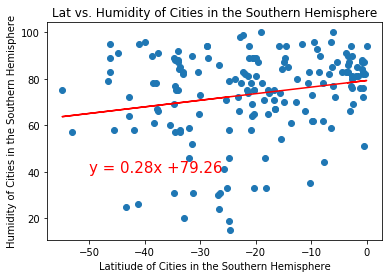

In [55]:
# Build scatter plot for latitude vs. humidity
sh_lat = southern_hemi_df["Lat"]
sh_hum = southern_hemi_df["Humidity"]
plt.scatter(sh_lat, sh_hum)

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_hum)
regress_values = slope * sh_lat + intercept

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities in the Southern Hemisphere")
plt.ylabel("Humidity of Cities in the Southern Hemisphere")
plt.title("Lat vs. Humidity of Cities in the Southern Hemisphere")
plt.plot(sh_lat, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

# Show plot
print(f"The r-value is: {rvalue}.")
plt.show()

**Discussion about the linear relationship:** The relationship between humidity and latitude is not strongly correlated in the northern or southern hemisphere. Both graphs show a slight positive correlation, meaning that humidity would increase when moving from the South Pole towards the Equator but also increase as one moves away from the Equator towards the North Pole. Based on the small r-value of both graphs, one can conlcude that latitude and humidity are not strongly correlated. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1718763213078174.


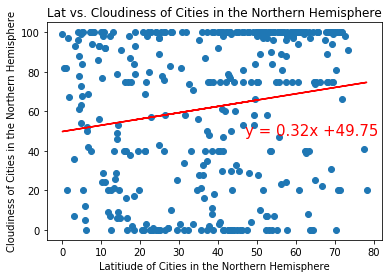

In [64]:
# Build scatter plot for latitude vs. cloudiness
nh_lat = northern_hemi_df["Lat"]
nh_clo = northern_hemi_df["Cloudiness"]
plt.scatter(nh_lat, nh_clo)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_clo)
regress_values = slope * nh_lat + intercept

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities in the Northern Hemisphere")
plt.ylabel("Cloudiness of Cities in the Northern Hemisphere")
plt.title("Lat vs. Cloudiness of Cities in the Northern Hemisphere")
plt.plot(nh_lat, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(47,48),fontsize=15,color="red")

# Show plot
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: 0.21939679519184832.


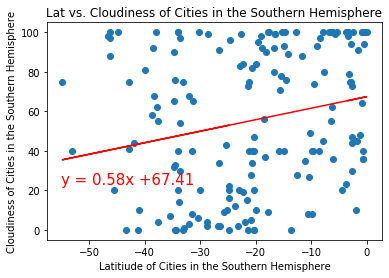

In [71]:
# Build scatter plot for latitude vs. cloudiness
sh_lat = southern_hemi_df["Lat"]
sh_clo = southern_hemi_df["Cloudiness"]
plt.scatter(sh_lat, sh_clo)

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_clo)
regress_values = slope * sh_lat + intercept

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities in the Southern Hemisphere")
plt.ylabel("Cloudiness of Cities in the Southern Hemisphere")
plt.title("Lat vs. Cloudiness of Cities in the Southern Hemisphere")
plt.plot(sh_lat, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,23),fontsize=15,color="red")

# Show plot
print(f"The r-value is: {rvalue}.")
plt.show()

**Discussion about the linear relationship:** As for humidity, latitude and cloudiness are both very loosely positively correlated meaning that cloudiness would both increase as one moves towards the Equator from the south but also as one moves away from it towards the North Pole. Based on the fact that the r-value is very close to zero, one can conclude that latitude and cloudiness are not strongly correlated. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12904721106164704.


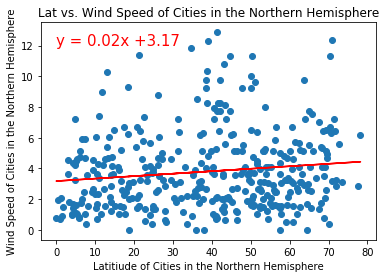

In [75]:
# Build scatter plot for latitude vs. wind speed
nh_lat = northern_hemi_df["Lat"]
nh_ws = northern_hemi_df["Wind Speed"]
plt.scatter(nh_lat, nh_ws)

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(nh_lat, nh_ws)
regress_values = slope * nh_lat + intercept

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities in the Northern Hemisphere")
plt.ylabel("Wind Speed of Cities in the Northern Hemisphere")
plt.title("Lat vs. Wind Speed of Cities in the Northern Hemisphere")
plt.plot(nh_lat, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(0,12),fontsize=15,color="red")

# Show plot
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: -0.34659112356689825.


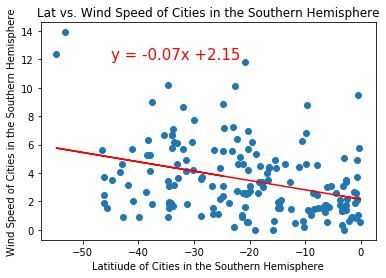

In [79]:
# Build scatter plot for latitude vs. wind speed
sh_lat = southern_hemi_df["Lat"]
sh_ws = southern_hemi_df["Wind Speed"]
plt.scatter(sh_lat, sh_ws)

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(sh_lat, sh_ws)
regress_values = slope * sh_lat + intercept

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities in the Southern Hemisphere")
plt.ylabel("Wind Speed of Cities in the Southern Hemisphere")
plt.title("Lat vs. Wind Speed of Cities in the Southern Hemisphere")
plt.plot(sh_lat, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-45,12),fontsize=15,color="red")

# Show plot
print(f"The r-value is: {rvalue}.")
plt.show()

**Discussion about the linear relationship:** The relationship between latitude and wind speed is barely at all positively correlated for the northern hemisphere and a little stronger negatively correlated for the southern hemisphere. This means that wind speeds are less the closer one is to the Equator and increase towards the poles. Due to the rather small r-values, especially for the northern hemisphere, no solid conclusions can be drawn about the relationship between latitude and wind speed. 